# Combine comparers
ModelSkill comparers can be combined using `merge`.

In [1]:
import modelskill as ms

## Observations

In [2]:
o1 = ms.PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = ms.TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Model Results

In [3]:
fn = "../tests/testdata/SW/CMEMS_DutchCoast_*.nc"
mr1 = ms.model_result(fn, name='CMEMS', item='VHM0')
mr1

<GridModelResult>: CMEMS
Time: 2017-10-28 00:00:00 - 2017-10-29 18:00:00
Quantity: Spectral significant wave height (Hm0) [m]

In [4]:
mr2 = ms.model_result('../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu', name='MIKE21SW', item=0)

## Match
Notice that the two ModelResults doesn't cover the exact same period.

<Axes: >

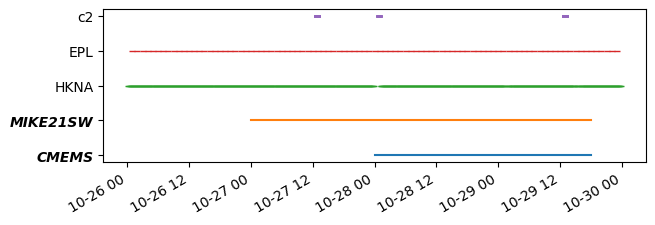

In [5]:
ms.plotting.temporal_coverage(obs=[o1,o2,o3], mod=[mr1,mr2], limit_to_model_period=False)

In [6]:
cc1 = ms.match(obs=[o1,o2,o3], mod=mr1)#, name='SW')
cc2 = ms.match(obs=[o1,o2,o3], mod=mr2)# , name='SW')

In [7]:
cc1.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
HKNA,242,-0.724389,0.864553,0.471924,0.724429,0.906446,0.126675,0.251523
EPL,43,-0.433137,0.511635,0.272329,0.435782,0.920654,0.089302,0.460214
c2,39,-0.302117,0.472280,0.363006,0.397694,0.935287,0.091603,0.745605


In [8]:
cc2.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
HKNA,386,-0.202413,0.355195,0.291877,0.255866,0.971708,0.093967,0.903554
EPL,67,-0.071238,0.224923,0.213344,0.189455,0.969760,0.082482,0.931793
c2,113,-0.004701,0.352470,0.352439,0.294758,0.975050,0.128010,0.899121


## Merge the two Comparers

In [9]:
cc = cc1.merge(cc2)

In [10]:
cc.skill()

n      bias      rmse     urmse       mae        cc  \
model    observation                                                          
CMEMS    HKNA         242 -0.724389  0.864553  0.471924  0.724429  0.906446   
         EPL           43 -0.433137  0.511635  0.272329  0.435782  0.920654   
         c2            39 -0.302117  0.472280  0.363006  0.397694  0.935287   
MIKE21SW HKNA         242 -0.239775  0.414822  0.338504  0.300389  0.949700   
         EPL           43 -0.084324  0.207253  0.189323  0.175296  0.972958   
         c2            39  0.319975  0.401442  0.242429  0.350164  0.966030   

                            si        r2  
model    observation                      
CMEMS    HKNA         0.126675  0.251523  
         EPL          0.089302  0.460214  
         c2           0.091603  0.745605  
MIKE21SW HKNA         0.090862  0.827687  
         EPL          0.062083  0.911427  
         c2           0.061176  0.816197